# Import The Libraries

In [1]:
#import lib
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten , Activation

# Rearrange the data creating our train and test arrays

In [2]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\marwa\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images=train_images1[:5000,:]
# train_labels=train_labels1[:5000]
# test_images=test_images1[:500,:]
# test_labels=test_labels1[:500]

In [4]:
#function to make the labeles as one hot vector
def label_reshape(arr_labele):
    label_vector=[]
    for i in range(len(arr_labele)):
        label_vector.append([0 for _ in range(10)])
        x = arr_labele[i]
        label_vector[i][x] = 1
    return label_vector  

In [5]:
train_labels = label_reshape(train_labels)
test_labels = label_reshape(test_labels)

In [6]:
train_labels[5]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [7]:
#checking the arrays
train_images.shape , type(train_images) , test_images.shape , type(test_images)

((60000, 28, 28), numpy.ndarray, (10000, 28, 28), numpy.ndarray)

# Plotting numbers

In [8]:
#function to plot the number
def plot_img(mnist_index):
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

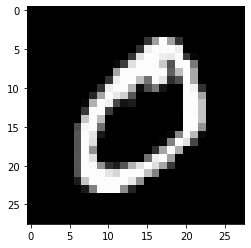

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [9]:
#test the function
plot_img(train_images[1])
train_labels[1]

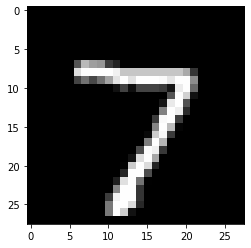

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [10]:
#test function
plot_img(test_images[0])
test_labels[0]

#Normalize the Data and Resahpe the img

In [11]:
train_images = tf.keras.utils.normalize(train_images,axis = 1)
test_images = tf.keras.utils.normalize(test_images,axis = 1)

#Resahpe the images to make it suitable

In [12]:
#function to reshape
def reshape_img(img):
  img_size = img.shape[1]
  img = img.reshape(-1,img_size,img_size,1)
  return img

In [13]:
#increase 1 dim for filter operation
train_images = reshape_img(np.array(train_images))
test_images = reshape_img(np.array(test_images))

print(train_images.shape,test_images.shape)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# **Creat our CNN**




In [14]:
#creat the model
model = Sequential()

#conv layers

##first CNN layer
model.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model.add(Activation("tanh"))

##second CNN layer
model.add(Conv2D(32,(2,2)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model.add(Conv2D(64,(2,2)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

#FC layers

##first FC layer
model.add(Dense(64))
model.add(Activation("tanh"))

##second FC layer
model.add(Dense(32))
model.add(Activation("tanh"))
model.add(Dropout(0.25))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 16)        80        
                                                                 
 activation (Activation)     (None, 27, 27, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        8256      
                                                        

In [15]:
#fiting data
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 35s 11ms/step - loss: 0.3397 - accuracy: 0.9042
Epoch 2/15
3000/3000 [==============================] - 34s 11ms/step - loss: 0.1119 - accuracy: 0.9678
Epoch 3/15
3000/3000 [==============================] - 32s 11ms/step - loss: 0.0754 - accuracy: 0.9785
Epoch 4/15
3000/3000 [==============================] - 34s 11ms/step - loss: 0.0575 - accuracy: 0.9834
Epoch 5/15
3000/3000 [==============================] - 35s 12ms/step - loss: 0.0476 - accuracy: 0.9864
Epoch 6/15
3000/3000 [==============================] - 34s 11ms/step - loss: 0.0383 - accuracy: 0.9893
Epoch 7/15
3000/3000 [==============================] - 32s 11ms/step - loss: 0.0318 - accuracy: 0.9909
Epoch 8/15
3000/3000 [==============================] - 32s 11ms/step - loss: 0.0269 - accuracy: 0.9921
Epoch 9/15
3000/3000 [==============================] - 34s 11ms/step - loss: 0.0223 - accuracy: 0.9935
Epoch 10/15
3000/3000 [==============================] - 34s 11m

In [16]:
#testing the model
loss, acc =model.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0356 - accuracy: 0.9890
loss = 0.035645466297864914
accuracy = 0.9890000224113464


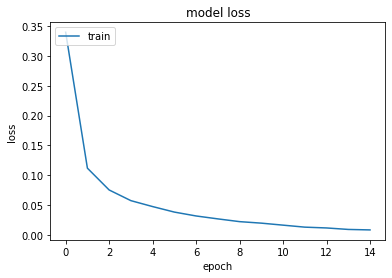

In [17]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

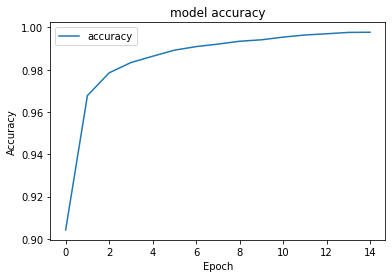

In [18]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

#Test model by draw of number we make it

In [19]:
import cv2 

In [20]:
test_img = cv2.imread('5.png')

(405, 362, 3)

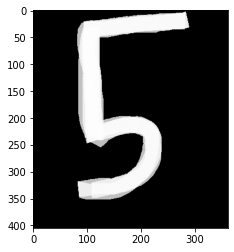

In [21]:
plt.imshow(test_img)
test_img.shape

In [22]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img.shape

(405, 362)

In [23]:
#reshaping the photo
test_img = cv2.resize(test_img, (28,28), interpolation = cv2.INTER_AREA )
test_img.shape

(28, 28)

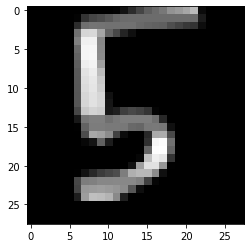

In [24]:
#plot after reshaping
test_img = tf.keras.utils.normalize(test_img,axis = 1)
plot_img(test_img)

In [25]:
test_img = reshape_img(np.array(test_img))
test_img.shape

(1, 28, 28, 1)

In [26]:
#predict the photo
p = model.predict(test_img)
print(np.argmax(p))

5


#**Predict video we made it**

In [27]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

In [28]:
#load the video
cap = cv2.VideoCapture('123456789.mp4')
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError(' Cannot open the video :( ')
#print the number of video frames
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

879


In [29]:
#Prepare text box
text = "TEXT"
(text_width,text_height) = cv2.getTextSize(text,font,font_scale,1)[0]
text_offset_x = 10
text_offset_y = 10
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2,text_offset_y - text_height - 2))
cntr = 0

In [30]:
#loob on the frames
while (cntr < length):
  ret,frame = cap.read()
  cntr = cntr + 1
  if (cntr%2 == 0 ):
    #reshape the frame
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA )
    img = tf.keras.utils.normalize(img,axis = 1)
    img = reshape_img(np.array(img))
    #predict the number
    predicition = model.predict(img)
    result = np.argmax(predicition)

    print(result)
    print(type(result))
    
    x1,y1,w1,h1 = 0,0,35,35
    cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (255,255,255), -1)
    cv2.putText(frame, result.astype(str), (x1 + int(w1/5), y1 + int(h1/1.5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0) ,2)

    cv2.imshow('Digits Recognition ',frame)
    cv2.waitKey(2)

cap.release()
cv2.destroyAllWindows


1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
7
<class 'numpy.int64'>
7
<class 'numpy.int64'>
7
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
9
<class 'numpy.int64'>
9
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.

<function destroyAllWindows>